In [30]:
%pylab inline
from opt import trainAndEvaluatePrimalModel
import sklearn.metrics as metrics
import kernels
from importlib import reload
import theano.sandbox.cuda as cuda

import kernels
reload(kernels)
from kernels import *
from utils import *
import theano


from theano import function, config, shared, sandbox
import theano.misc.pycuda_init
import theano.tensor as T
from theano import gpuarray
from theano.tensor.nnet import conv2d
from theano.tensor.signal.pool import pool_2d

Populating the interactive namespace from numpy and matplotlib


In [2]:
DATAPATH = '/data/vaishaal/endive-exp/EGR1_withNegatives/'

In [3]:
XSeqTrain, labelsTrain = loadSeqFromText(DATAPATH + "EGR1_H1-hESC_Egr-1_HudsonAlpha_AC.seq", delim=' ')

In [4]:
XSeqTest, labelsTest = loadSeqFromText(DATAPATH + "EGR1_GM12878_Egr-1_HudsonAlpha_B.seq", delim='\t')

In [5]:
XTrain = convertSeqToMatrix(XSeqTrain)
XTest = convertSeqToMatrix(XSeqTest)

In [23]:
D = 8192 
W = np.random.randn(D,8*4) * 1.0
b = np.random.uniform(0,1,size=D)

In [ ]:
%time XLiftTrain_cpu = generateConvFeatures(XTrain, W, offset=b, gpu=False)
%time XLiftTest_cpu = generateConvFeatures(XTest, W, offset=b, gpu=False)

In [31]:
%time XLiftTrain_gpu = generateConvFeatures(XTrain, W, batch_size=1024, num_feature_batches=4, gpu=True)
%time XLiftTest_gpu = generateConvFeatures(XTest, W, offset=b, gpu=True)

GPU IMPLEMENTATION STILL BUGGY
Feature Batch  0
Data Batch  0
(1024, 2048, 1, 2)
Data Batch  1
(1024, 2048, 1, 2)
Data Batch  2
(1024, 2048, 1, 2)
Data Batch  3
(1024, 2048, 1, 2)
Data Batch  4
(1024, 2048, 1, 2)
Data Batch  5
(1024, 2048, 1, 2)
Data Batch  6
(1024, 2048, 1, 2)
Data Batch  7
(1024, 2048, 1, 2)
Data Batch  8
(1024, 2048, 1, 2)
Data Batch  9
(1024, 2048, 1, 2)
Data Batch  10
(1024, 2048, 1, 2)
Data Batch  11
(1024, 2048, 1, 2)
Data Batch  12
(1024, 2048, 1, 2)
Data Batch  13
(1024, 2048, 1, 2)
Data Batch  14
(1024, 2048, 1, 2)
Data Batch  15
(1024, 2048, 1, 2)
Data Batch  16
(102, 2048, 1, 2)
Feature Batch  1
Data Batch  0
(1024, 2048, 1, 2)
Data Batch  1
(1024, 2048, 1, 2)
Data Batch  2
(1024, 2048, 1, 2)
Data Batch  3
(1024, 2048, 1, 2)
Data Batch  4
(1024, 2048, 1, 2)
Data Batch  5
(1024, 2048, 1, 2)
Data Batch  6
(1024, 2048, 1, 2)
Data Batch  7
(1024, 2048, 1, 2)
Data Batch  8
(1024, 2048, 1, 2)
Data Batch  9
(1024, 2048, 1, 2)
Data Batch  10
(1024, 2048, 1, 2)
Data

In [22]:
XLiftTrain_gpu.shape

(16486, 4096)

In [78]:
XLiftTrain_gpu

array([[ -5.30992985],
       [-15.66732216],
       [ -2.41803646],
       ..., 
       [ -7.97012615],
       [ -1.52358055],
       [-16.94457054]])

X SHAPE  (16486, 404)
Computing XTX
Done Computing XTX
Train acc 0.567087225525
Test acc 0.611611611612
Train ROC  0.597968816865
Test ROC  0.655462925852


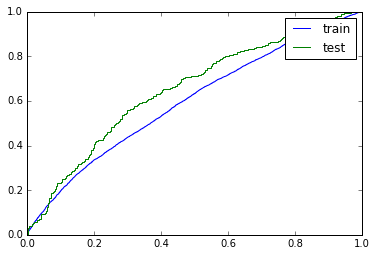

In [35]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XTrain, XTest, labelsTrain, labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

X SHAPE  (16486, 1)
Computing XTX
Done Computing XTX
Train acc 0.499878684945
Test acc 0.503503503504
Train ROC  0.524051692076
Test ROC  0.555350701403


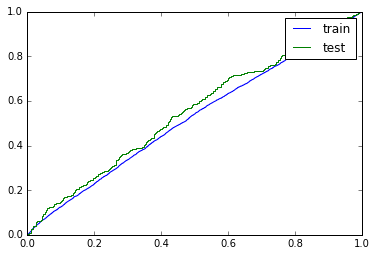

In [107]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_cpu, XLiftTest_cpu,labelsTrain,labelsTest)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

X SHAPE  (16486, 16384)
Computing XTX
Done Computing XTX
Train acc 0.976161591654
Test acc 0.857857857858
Train ROC  0.997809080715
Test ROC  0.930541082164


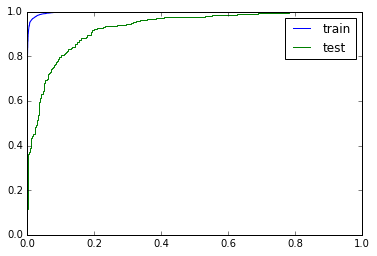

In [35]:
train_roc, test_roc = trainAndEvaluatePrimalModel(XLiftTrain_gpu, XLiftTest_gpu,labelsTrain,labelsTest, reg=100000)
train = plt.plot(train_roc[0], train_roc[1], label="train")
test = plt.plot(test_roc[0], test_roc[1], label="test")
print ("Train ROC ", metrics.auc(train_roc[0], train_roc[1]))
print ("Test ROC ", metrics.auc(test_roc[0], test_roc[1]))
plt.legend(handles=[train[0], test[0]])

In [118]:
PyCUDACos()(4.0).eval()

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: PyCUDACos(CudaNdarrayConstant{4.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/data/vaishaal/anaconda3/lib/python3.5/site-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/data/vaishaal/anaconda3/lib/python3.5/site-packages/theano/tensor/opt.py", line 5825, in constant_folding
    no_recycling=[])
TypeError: make_thunk() got an unexpected keyword argument 'no_recycling'

ERROR (theano.gof.opt): Optimization failure due to: constant_folding
ERROR (theano.gof.opt): node: PyCUDACos(CudaNdarrayConstant{4.0})
ERROR (theano.gof.opt): TRACEBACK:
ERROR (theano.gof.opt): Traceback (most recent call last):
  File "/data/vaishaal/anaconda3/lib/python3.5/site-packages/theano/gof/opt.py", line 1772, in process_node
    replacements = lopt.transform(node)
  File "/data/vaishaal/anaconda3/

NameError: ('The following error happened while compiling the node', PyCUDACos(CudaNdarrayConstant{4.0}), '\n', "name 'SourceModule' is not defined")

In [113]:
cuda

<module 'theano.sandbox.cuda' from '/data/vaishaal/anaconda3/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py'>